In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Datasets/CNN - Simple implementation/train_CNN.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('/content/drive/MyDrive/Datasets/CNN - Simple implementation/test_CNN.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)

In [5]:
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

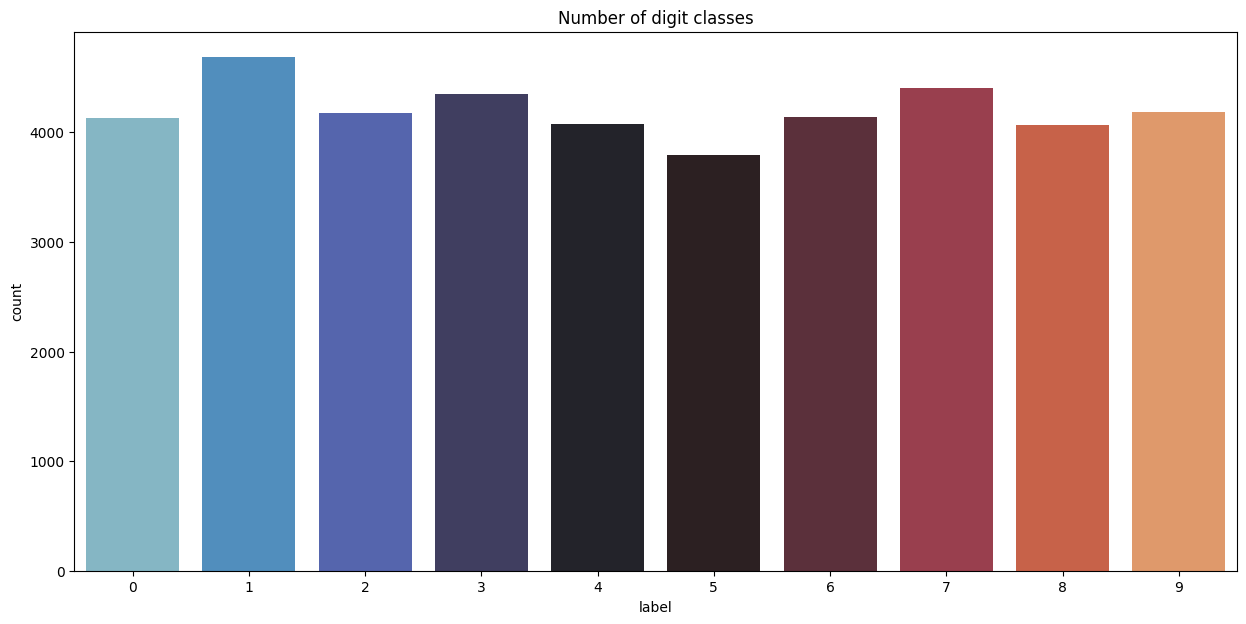

In [6]:
plt.figure(figsize=(15, 7))
g = sns.countplot(x=Y_train, palette='icefire')
plt.title('Number of digit classes')
Y_train.value_counts()

In [7]:
train['label']

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

<Axes: xlabel='label', ylabel='count'>

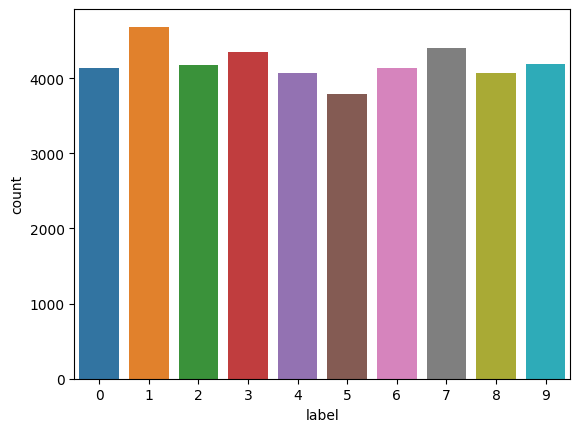

In [8]:
sns.countplot(x=train['label'])

In [9]:
img = X_train.iloc[0]
print(X_train)
img

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

(784,)


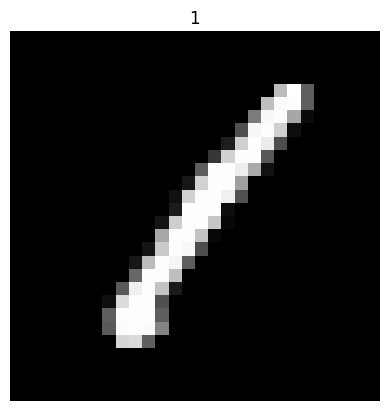

In [10]:
img = X_train.iloc[0].to_numpy()
print(img.shape)
img = img.reshape((28,28))
plt.imshow(img, cmap='gist_gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

(784,)


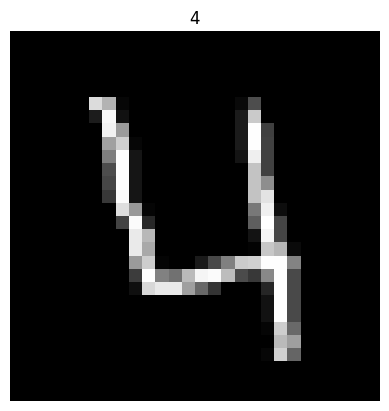

In [11]:
img = X_train.iloc[3].to_numpy()
print(img.shape)
img = img.reshape((28,28))
plt.imshow(img, cmap='gist_gray')
plt.title(train.iloc[3,0])
plt.axis('off')
plt.show()

Normalization, Reshape, Label Encoding

In [14]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
X_train.shape

(42000, 784)

In [13]:
#Normalize the data
X_train = X_train/ 255.0
test = test / 255.0
print('X_train shape: ', X_train.shape)
print('test shape: ', test.shape)

X_train shape:  (42000, 784)
test shape:  (28000, 784)


In [16]:
#Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
print("x_train shape", X_train.shape)
print("test shape", test.shape)

x_train shape (42000, 28, 28, 1)
test shape (28000, 28, 28, 1)


In [17]:
#Label Encoding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=10)

Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)
print("X_train shape", X_train.shape)
print("X_test shape", X_val.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_val.shape)

X_train shape (37800, 28, 28, 1)
X_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


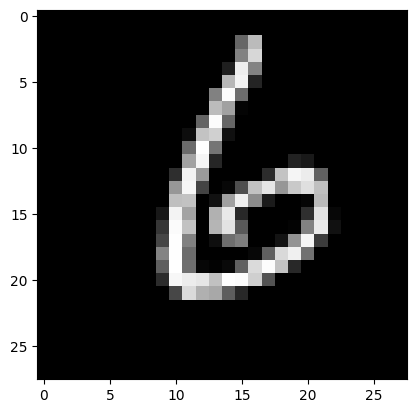

In [22]:
plt.imshow(X_train[2][:, :, 0], cmap="gist_gray")
plt.show()

Convolutional Neural Network

In [25]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical #convert to one-hot encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#Fully Connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Define Optimizer

In [26]:
#Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

Compile Model

In [27]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

Epochs and Batch Size

In [33]:
epochs = 10
batch_size = 250

Data Augmentation

In [29]:
#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center= False,
    featurewise_std_normalization= False,
    zca_whitening= False,
    rotation_range= 5,
    zoom_range= 0.1,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    horizontal_flip=False,
    vertical_flip= False
)

datagen.fit(X_train)

Fit the model

In [34]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size= batch_size), epochs=epochs, validation_data=(X_val, y_val), steps_per_epoch=X_train.shape[0]/batch_size)

Epoch 1/10
151/151 [==============================] - 30s 190ms/step - loss: 1.9566 - accuracy: 0.3178 - val_loss: 0.9632 - val_accuracy: 0.7093
Epoch 2/10
151/151 [==============================] - 26s 170ms/step - loss: 1.2138 - accuracy: 0.5881 - val_loss: 0.6556 - val_accuracy: 0.8169
Epoch 3/10
151/151 [==============================] - 38s 252ms/step - loss: 0.9804 - accuracy: 0.6753 - val_loss: 0.4790 - val_accuracy: 0.8700
Epoch 4/10
151/151 [==============================] - 38s 252ms/step - loss: 0.8133 - accuracy: 0.7326 - val_loss: 0.3913 - val_accuracy: 0.8890
Epoch 5/10
151/151 [==============================] - 32s 209ms/step - loss: 0.7228 - accuracy: 0.7642 - val_loss: 0.3417 - val_accuracy: 0.9012
Epoch 6/10
151/151 [==============================] - 34s 223ms/step - loss: 0.6551 - accuracy: 0.7889 - val_loss: 0.3143 - val_accuracy: 0.9057
Epoch 7/10
151/151 [==============================] - 37s 243ms/step - loss: 0.5992 - accuracy: 0.8067 - val_loss: 0.2840 - val_ac

Evaluate the model:
Test Loss Visualization
Confusion Matrix

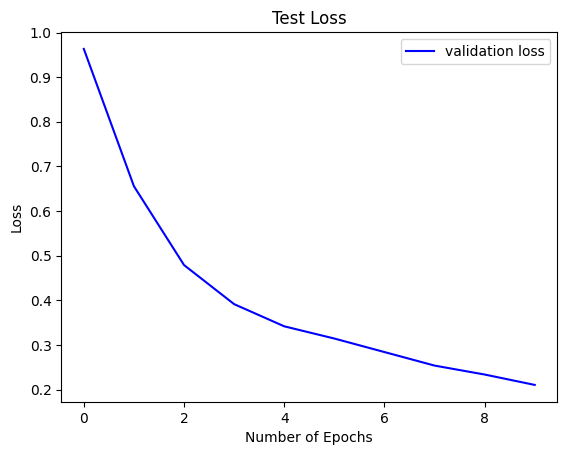

In [36]:
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

132/132 [==============================] - 1s 10ms/step


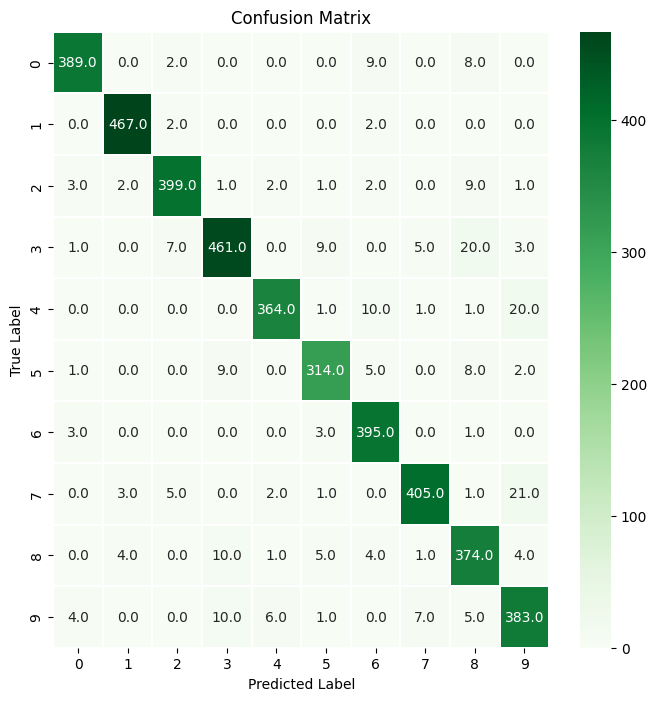

In [38]:
#Confusion matrix
import seaborn as sns

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_val, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
#plot the confusion matrix
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap='Greens', fmt='.1f', ax=ax )
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()